# Uvod u podatkovnu znanost - LO 5 zadatak - Filip Paležac

<a href='#1.-Data-quality-analysis-and-visualization' style="font-size: 18px; text-decoration: none; margin-left: 30px;">1. Data quality analysis and visualization</a><br>

<a href='#2.-Univariant-analysis' style="font-size: 18px; text-decoration: none; margin-left: 30px;">2. Univariant analysis</a><br>

<a href='#3.-Model-development' style="font-size: 18px; text-decoration: none; margin-left: 30px;">3. Model development</a><br>


In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

Our dataset is Bike Sharing dataset.

<div style="display: block;margin-left: auto;margin-right: auto;width: 100%;">
<br><a href="https://archive.ics.uci.edu/ml/datasets/bike+sharing+dataset"><b> DATASET</b></a></div>


Dataset contains this columns with data:
 
>- instant: record index
>- dteday : date
>- season : season (1:springer, 2:summer, 3:fall, 4:winter)
>- yr : year (0: 2011, 1:2012)
>- mnth : month ( 1 to 12)
>- hr : hour (0 to 23)
>- holiday : weather day is holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
>- weekday : day of the week
>- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
>- weathersit : 
    - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
	- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
	- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
	- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
>- temp : Normalized temperature in Celsius. The values are divided to 41 (max)
>- atemp: Normalized feeling temperature in Celsius. The values are divided to 50 (max)
>- hum: Normalized humidity. The values are divided to 100 (max)
>- windspeed: Normalized wind speed. The values are divided to 67 (max)
>- casual: count of casual users
>- registered: count of registered users
>- cnt: count of total rental bikes including both casual and registered


## 1. Data quality analysis and visualization

In [2]:
data_hour=pd.read_csv("hour.csv")

In [3]:
data_hour.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [4]:
data_hour.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
hr              int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

### Removing "instant" column it is just index and setting "dteday" columns as new index.

### Also changing data type of "dteday" to time-series so it can fit to index.

In [5]:
data_hour=data_hour.drop("instant",axis=1)
data_hour=data_hour.rename(columns={"dteday":"index"})
data_hour["index"]=data_hour["index"].astype("datetime64")
data_hour=data_hour.set_index("index")

In [6]:
data_hour.head()

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
index,,,,,,,,,,,,,,,
2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [7]:
data_hour.describe()

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [8]:
data_hour.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 17379 entries, 2011-01-01 to 2012-12-31
Data columns (total 15 columns):
season        17379 non-null int64
yr            17379 non-null int64
mnth          17379 non-null int64
hr            17379 non-null int64
holiday       17379 non-null int64
weekday       17379 non-null int64
workingday    17379 non-null int64
weathersit    17379 non-null int64
temp          17379 non-null float64
atemp         17379 non-null float64
hum           17379 non-null float64
windspeed     17379 non-null float64
casual        17379 non-null int64
registered    17379 non-null int64
cnt           17379 non-null int64
dtypes: float64(4), int64(11)
memory usage: 2.1 MB


In [9]:
data_hour.columns

Index(['season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual',
       'registered', 'cnt'],
      dtype='object')

### Changing names of columns to easily know what it represents.

In [10]:
data_hour.rename(columns={"yr":"year",
                     "mnth":"month",
                     "hr":"hour",
                     "weathersit":"weather condition",
                     "temp":"temperature",
                     "atemp":"feeling temperature",
                     "hum":"humidity",
                     "cnt":"total count"},inplace=True)

In [11]:
data_hour.head()

,season,year,month,hour,holiday,weekday,workingday,weather condition,temperature,feeling temperature,humidity,windspeed,casual,registered,total count
index,,,,,,,,,,,,,,,
2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### No missing values!

In [12]:
data_hour.isnull().sum()

season                 0
year                   0
month                  0
hour                   0
holiday                0
weekday                0
workingday             0
weather condition      0
temperature            0
feeling temperature    0
humidity               0
windspeed              0
casual                 0
registered             0
total count            0
dtype: int64

### Total number of rented bikes in both years.

year
0    1243103
1    2049576
Name: total count, dtype: int64


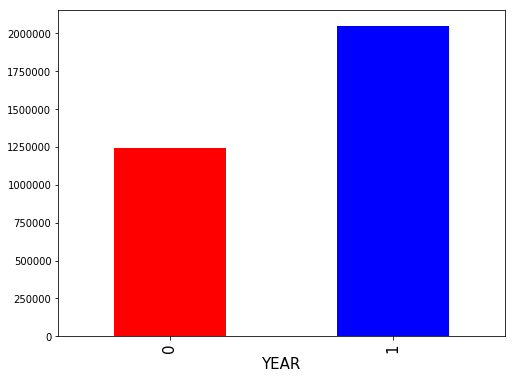

In [13]:
print(data_hour["total count"].groupby(data_hour["year"]).sum())

plt.figure(figsize=(8,6))
data_hour["total count"].groupby(data_hour["year"]).sum().plot.bar(color=["red","blue"]);
plt.xticks(fontsize=15)
plt.xlabel("YEAR",fontsize=15);

### Total number of rented bikes by "casual" and "registered" users.

In [14]:
print("Total number of casual renters:" ,data_hour["casual"].sum())
print(data_hour["casual"].groupby(data_hour["year"]).sum())
print("")
print("Total number of registered renters:" ,data_hour["registered"].sum())
print(data_hour["registered"].groupby(data_hour["year"]).sum())


Total number of casual renters: 620017
year
0    247252
1    372765
Name: casual, dtype: int64

Total number of registered renters: 2672662
year
0     995851
1    1676811
Name: registered, dtype: int64


Total number of rented bikes: 3292679


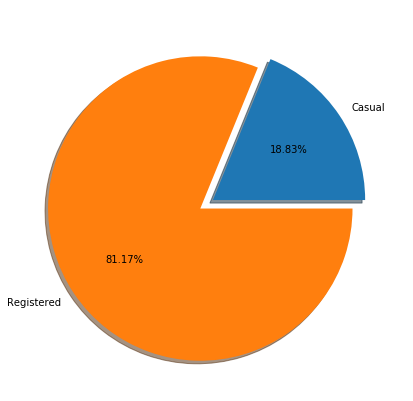

In [15]:
print("Total number of rented bikes:",data_hour["total count"].sum())

plt.figure(figsize=(7,7))
c=data_hour["casual"].sum()
r=data_hour["registered"].sum()
t=[c,r]
L=["Casual","Registered"]
explode = (0, 0.1)
plt.pie(t, explode=explode, labels=L, autopct='%.2f%%', shadow=True);

### Number of rented bikes in each season for both years.

year  season
0     1         150000
      2         347316
      3         419650
      4         326137
1     1         321348
      2         571273
      3         641479
      4         515476
Name: total count, dtype: int64


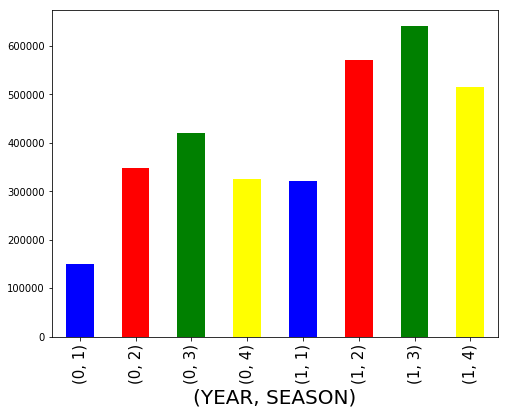

In [16]:
print(data_hour["total count"].groupby([(data_hour.year),(data_hour.season)]).sum())

plt.figure(figsize=(8,6))
data_hour["total count"].groupby([(data_hour.year),(data_hour.season)]).sum().plot.bar(color=["blue","red","green","yellow"])
plt.xticks(fontsize=15)
plt.xlabel("(YEAR, SEASON)",fontsize=20);


### Number of rented bikes for every month in both year.

year  month
0     1         38189
      2         48215
      3         64045
      4         94870
      5        135821
      6        143512
      7        141341
      8        136691
      9        127418
      10       123511
      11       102167
      12        87323
1     1         96744
      2        103137
      3        164875
      4        174224
      5        195865
      6        202830
      7        203607
      8        214503
      9        218573
      10       198841
      11       152664
      12       123713
Name: total count, dtype: int64


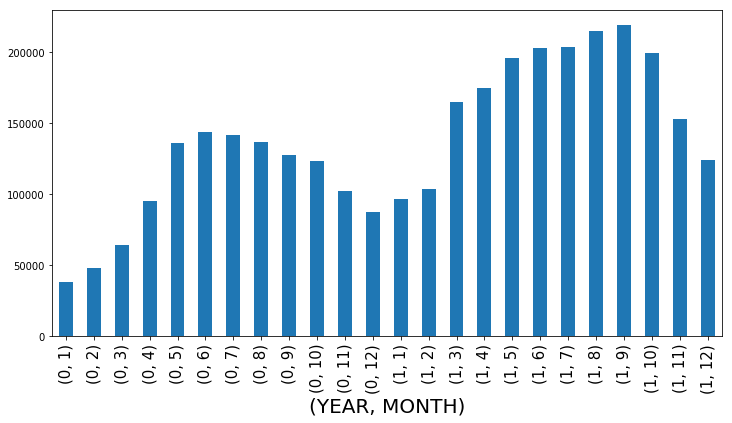

In [17]:
print(data_hour["total count"].groupby([(data_hour.year),(data_hour.month)]).sum())

plt.figure(figsize=(12,6))
data_hour["total count"].groupby([(data_hour.year),(data_hour.month)]).sum().plot.bar()
plt.xticks(fontsize=15)
plt.xlabel("(YEAR, MONTH)",fontsize=20);

### Comments:
   - we see that number of rented bikes has growth from 2011 to 2012
   - we see growth from spring and easy drop until end of fall for each year
   - so we can say that during summer is most rented bikes and in winter smallest number, which is logical
   - when it starts to be warmier more people will ride bikes
    

### Bikes rented (in total / by registered users / by casual users) for every day in week and for every hour in day.

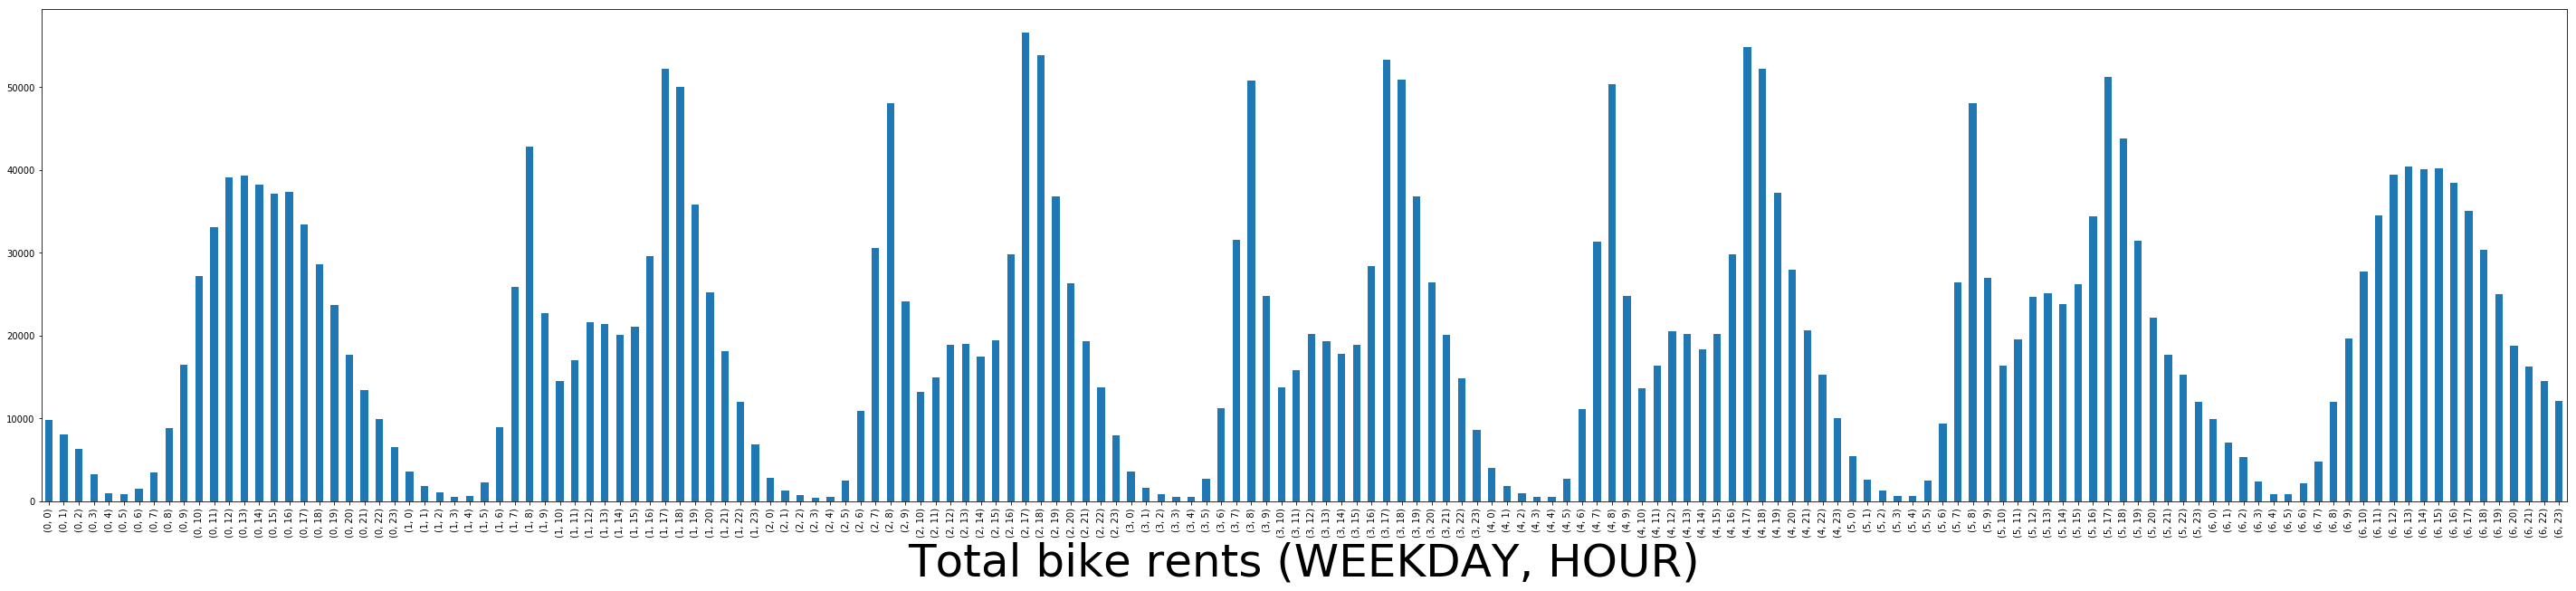

In [18]:
plt.figure(figsize=(50,10))
data_hour["total count"].groupby([(data_hour.weekday),(data_hour.hour)]).sum().plot.bar()
plt.xlabel('Total bike rents (WEEKDAY, HOUR)',fontsize=50);

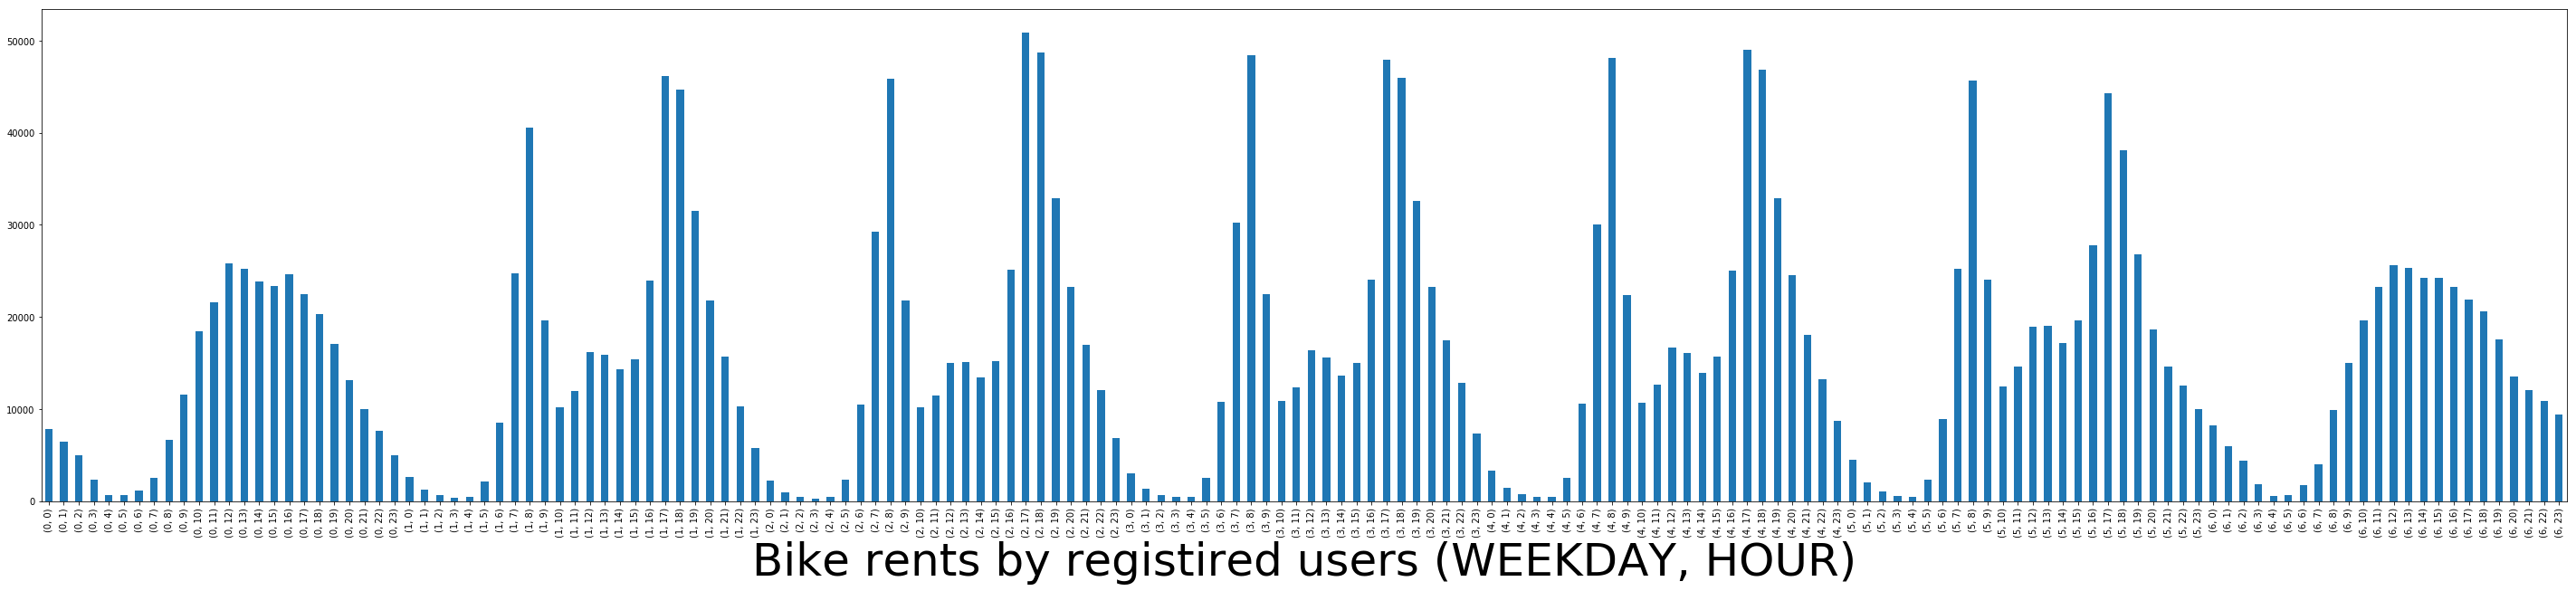

In [19]:
plt.figure(figsize=(50,10))
data_hour["registered"].groupby([(data_hour.weekday),(data_hour.hour)]).sum().plot.bar()
plt.xlabel('Bike rents by registired users (WEEKDAY, HOUR)',fontsize=50);

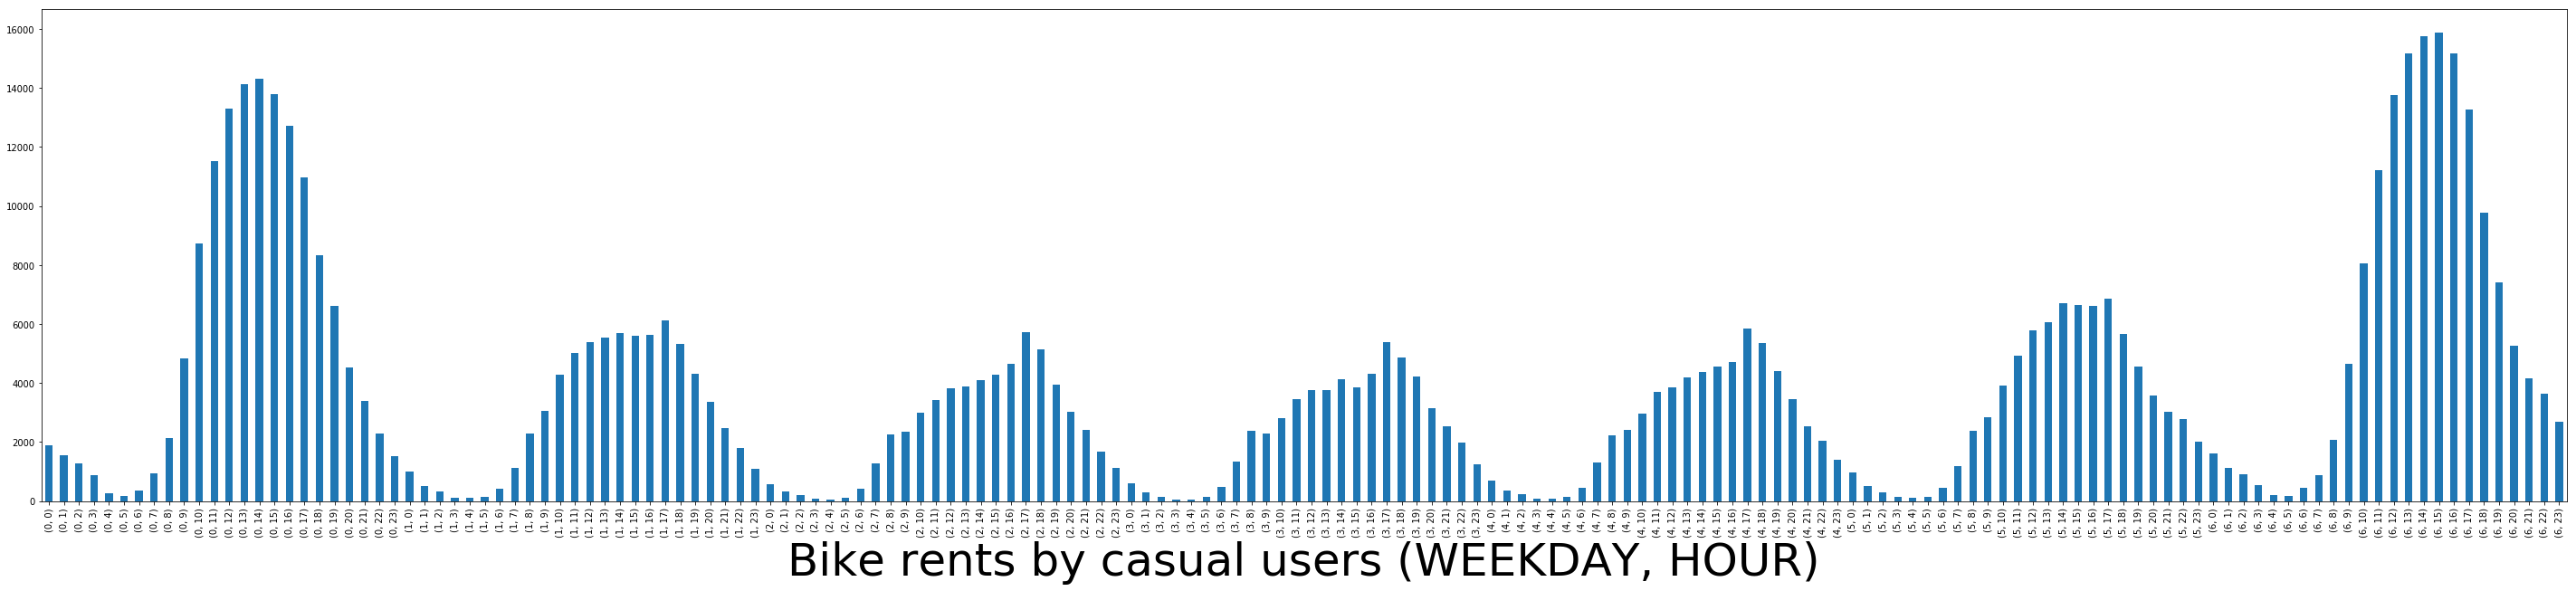

In [20]:
plt.figure(figsize=(50,10))
data_hour["casual"].groupby([(data_hour.weekday),(data_hour.hour)]).sum().plot.bar()
plt.xlabel('Bike rents by casual users (WEEKDAY, HOUR)',fontsize=50);

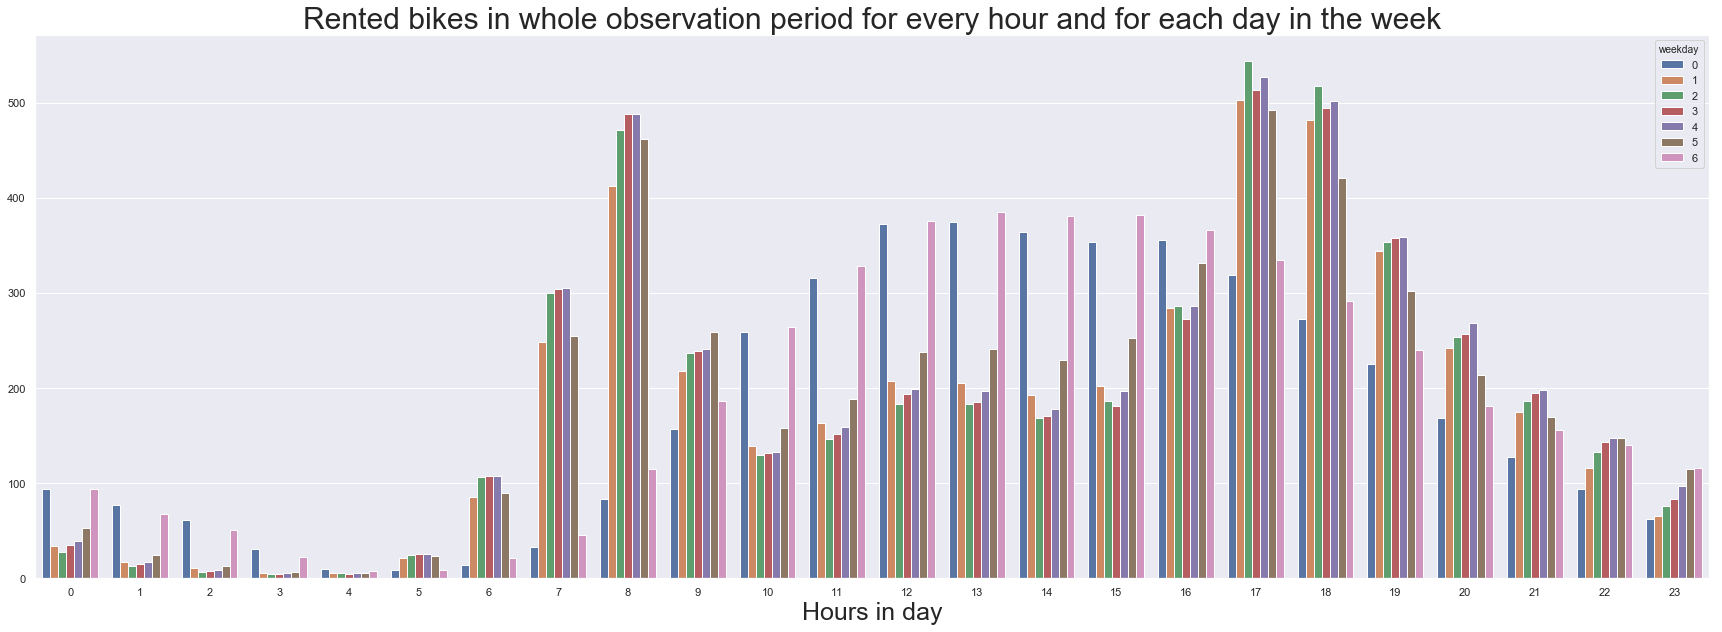

In [21]:
sns.set(rc={"figure.figsize":(30,10)})
fig,ax = plt.subplots()
sns.barplot(data=data_hour[['hour','total count','weekday']],x='hour',y='total count' ,hue='weekday', ci=None, ax=ax)
ax.set_xlabel("Hours in day",fontsize=25)
ax.set_ylabel("")
ax.set_title("Rented bikes in whole observation period for every hour and for each day in the week",fontdict={'fontsize': 30});


### Commnets:
   - we see interesting pattern in ranting bikes for working day in week and for weekends
   - also interested pattern for specific hour in day on working day for registered users, in 7 & 8 and 17 & 18 we see big jump in renting bike ... in that time people go to work and later back home with bike
   - for weekends we see rental jumps by casual users

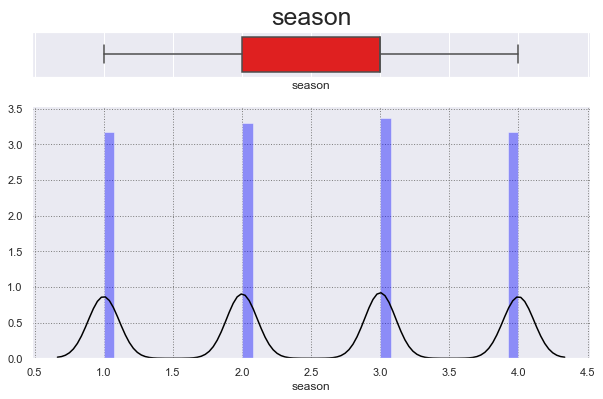

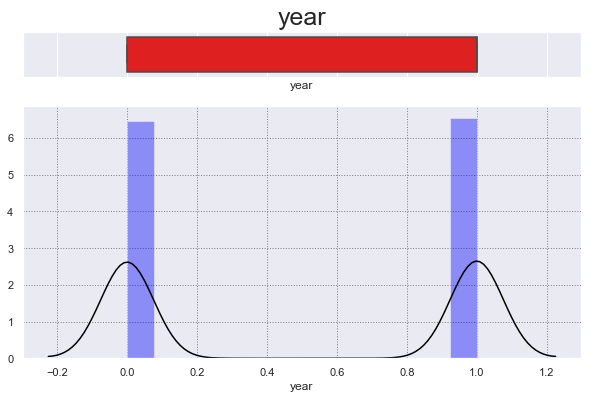

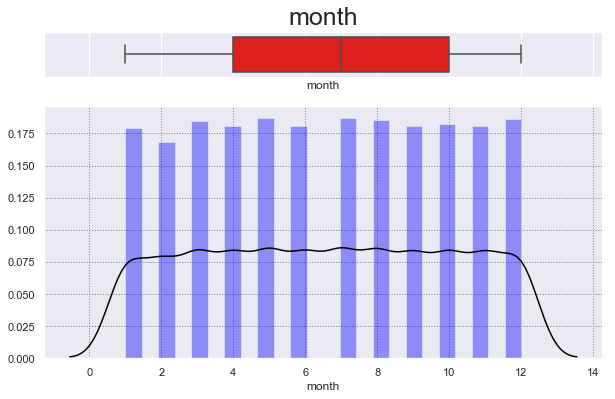

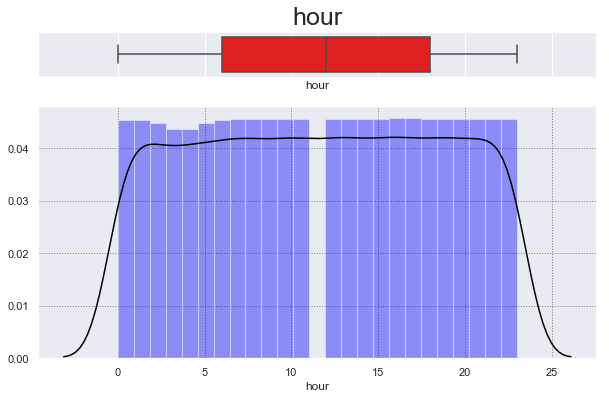

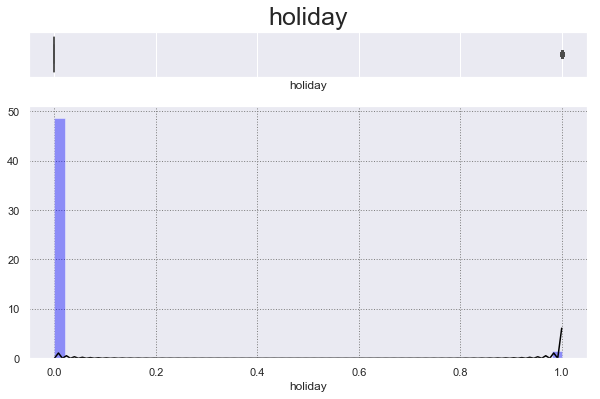

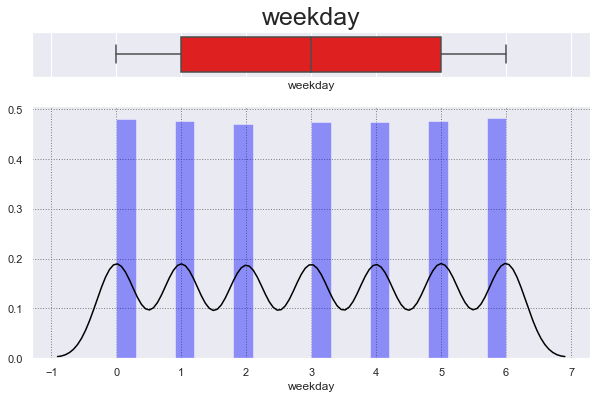

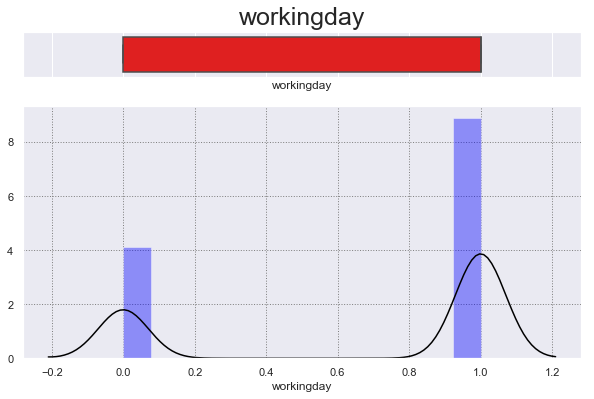

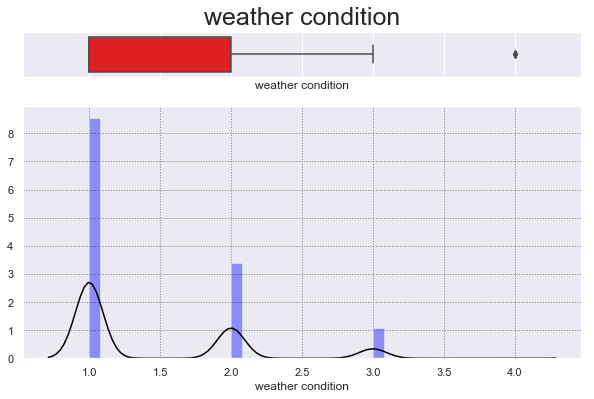

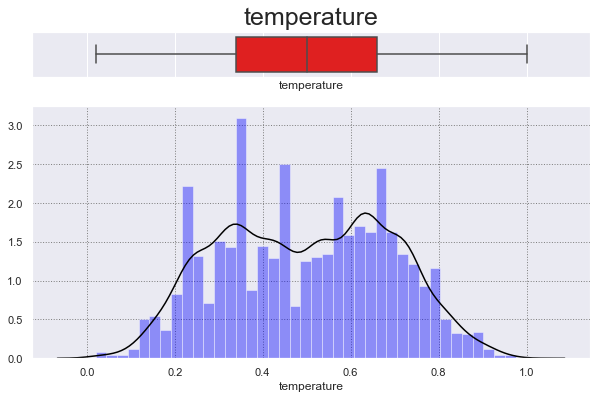

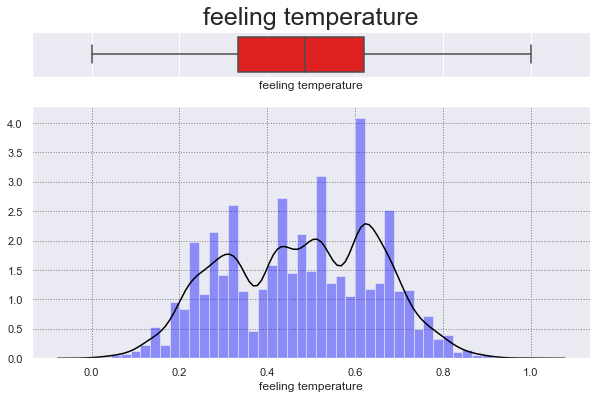

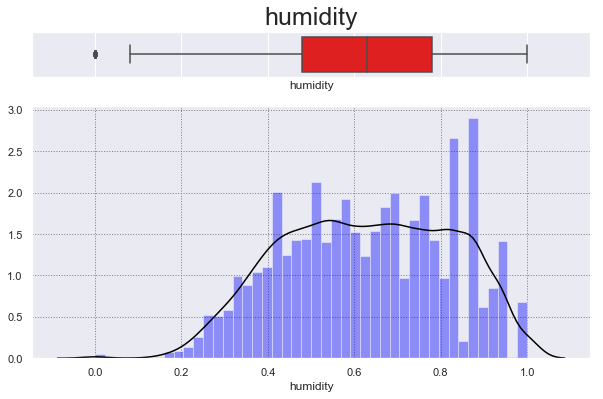

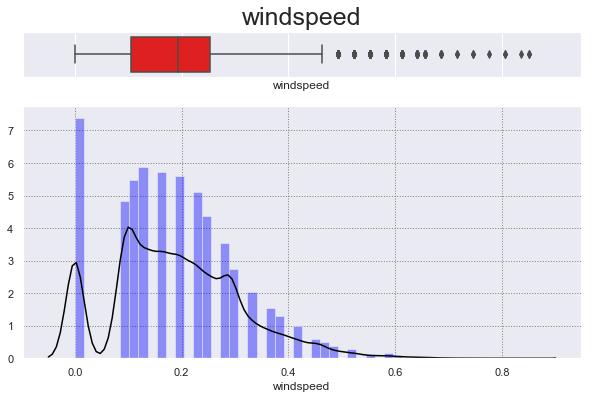

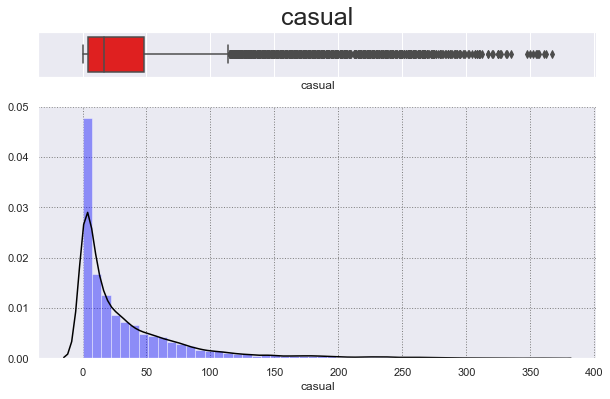

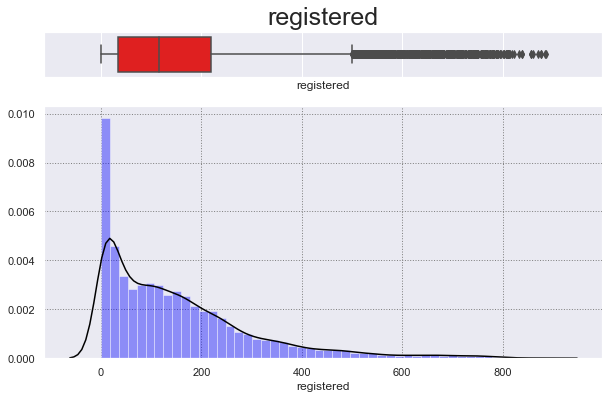

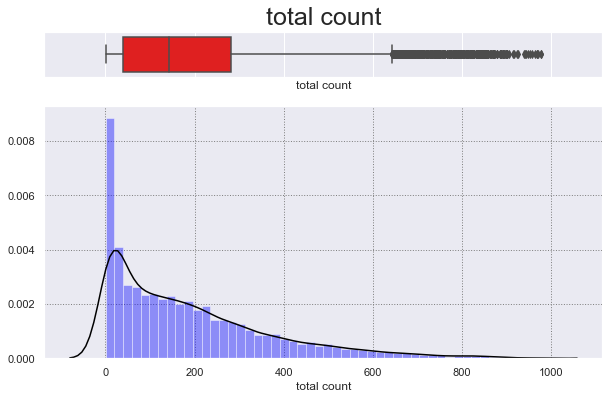

In [22]:
for stupac in data_hour.columns:
    sns.set(rc={"figure.figsize":(10,6)})
    x, (boxplot, hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
    hist=sns.distplot(data_hour[stupac],color="blue", kde_kws={"color":"black"}, ax=hist)
    boxplot=sns.boxplot(data_hour[stupac],color="red", ax=boxplot)
    plt.title(stupac,y=1.3, fontsize = 25)
    plt.grid(color="gray", linestyle=":")
    plt.show();

### Comments:
   - in distribution i see expected results
   - for extremes in data i can say that thay are necessary because it cannot be affect to thoes values
   - number of rented bikes in total/by registered/by casual users have many extremes because most of the time people will       rent AVG number of bikes during the day, but at specific points, in this case hour, we see high jumps in renting           because of peoples habits (going to work, coming back home, holidays) so we can say that is normal for that
   - natural extremes (mostly windspeed) are also fine because they are also unaffected by us, they come and go, for high       number of renting i think biggest role has temperature and feeling temperature and thoes two have no outliers
   - so i wont touch outliers because thay provide many information about bike renting and thay need to be in data for           modeling

## 	2. Univariant analysis and preparation for predictive model

In [23]:
data_hour.head(1)

,season,year,month,hour,holiday,weekday,workingday,weather condition,temperature,feeling temperature,humidity,windspeed,casual,registered,total count
index,,,,,,,,,,,,,,,
2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16


### Setting target variable

#### For first model i will use target variable "hours" as:
    0 = hours from 0 to 11
    1 = hours from 12 to 23
    
#### For second model i will use target variable "hours" as:
    0 = every hour in day except 7,8,17,18
    1 = hours: 7,8,17,18

In [24]:
#setting target variable

X=data_hour.drop(columns="hour")
y=data_hour["hour"].replace({0:0,1:0,2:0,3:0,4:0,5:0,6:0,7:0,8:0,9:0,10:0,11:0,
                             12:1,13:1,14:1,15:1,16:1,17:1,18:1,19:1,20:1,21:1,22:1,23:1})

In [25]:
final_data=pd.concat([X,y], axis=1)

In [26]:
final_data.groupby([(final_data.weekday),(final_data.hour)]).head(1)

,season,year,month,holiday,weekday,workingday,weather condition,temperature,feeling temperature,humidity,windspeed,casual,registered,total count,hour
index,,,,,,,,,,,,,,,
2011-01-01,1,0,1,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16,0
2011-01-01,1,0,1,0,6,0,1,0.42,0.4242,0.77,0.2836,29,55,84,1
2011-01-02,1,0,1,0,0,0,2,0.46,0.4545,0.88,0.2985,4,13,17,0
2011-01-02,1,0,1,0,0,0,2,0.36,0.3333,0.66,0.2985,20,73,93,1
2011-01-03,1,0,1,0,1,1,1,0.22,0.1970,0.44,0.3582,0,5,5,0
2011-01-03,1,0,1,0,1,1,1,0.22,0.2121,0.35,0.2985,13,48,61,1
2011-01-04,1,0,1,0,2,1,1,0.16,0.1818,0.55,0.1045,0,5,5,0
2011-01-04,1,0,1,0,2,1,1,0.22,0.2273,0.51,0.1642,12,66,78,1
2011-01-05,1,0,1,0,3,1,1,0.20,0.2576,0.64,0.0000,0,6,6,0


### Weight of Evidence and Information Value

#### Since we have same target for both model we do WoE and IV on same data wihout target (hour)


In [27]:
import pandas.core.algorithms as algos
from pandas import Series
import scipy.stats.stats as stats
import re
import traceback
import string

In [28]:
max_bin = 20 # 20 bins so that each category (bin) will have 5% of observations
force_bin = 3 # to avoid produce of only one category while binning

# Define a binning function for continuous independent variables
def mono_bin(Y, X, n = max_bin):
    df1 = pd.DataFrame({"X": X, "Y": Y})
    justmiss = df1[['X','Y']][df1.X.isnull()]
    notmiss = df1[['X','Y']][df1.X.notnull()]
    r = 0
    while np.abs(r) < 1:
        try:
            d1 = pd.DataFrame({"X": notmiss.X, "Y": notmiss.Y, "Bucket": pd.qcut(notmiss.X, n)})
            d2 = d1.groupby('Bucket', as_index=True)
            r, p = stats.spearmanr(d2.mean().X, d2.mean().Y)
            n = n - 1 
        except Exception as e:
            n = n - 1

    if len(d2) == 1:
        n = force_bin         
        bins = algos.quantile(notmiss.X, np.linspace(0, 1, n))
        if len(np.unique(bins)) == 2:
            bins = np.insert(bins, 0, 1)
            bins[1] = bins[1]-(bins[1]/2)
        d1 = pd.DataFrame({"X": notmiss.X, "Y": notmiss.Y, "Bucket": pd.cut(notmiss.X, np.unique(bins),include_lowest=True)}) 
        d2 = d1.groupby('Bucket', as_index=True)
    
    d3 = pd.DataFrame({},index=[])
    d3["MIN_VALUE"] = d2.min().X
    d3["MAX_VALUE"] = d2.max().X
    d3["COUNT"] = d2.count().Y
    d3["EVENT"] = d2.sum().Y
    d3["NONEVENT"] = d2.count().Y - d2.sum().Y
    d3=d3.reset_index(drop=True)
    
    if len(justmiss.index) > 0:
        d4 = pd.DataFrame({'MIN_VALUE':np.nan},index=[0])
        d4["MAX_VALUE"] = np.nan
        d4["COUNT"] = justmiss.count().Y
        d4["EVENT"] = justmiss.sum().Y
        d4["NONEVENT"] = justmiss.count().Y - justmiss.sum().Y
        d3 = d3.append(d4,ignore_index=True)
    
    d3["EVENT_RATE"] = d3.EVENT/d3.COUNT
    d3["NON_EVENT_RATE"] = d3.NONEVENT/d3.COUNT
    d3["DIST_EVENT"] = d3.EVENT/d3.sum().EVENT
    d3["DIST_NON_EVENT"] = d3.NONEVENT/d3.sum().NONEVENT
    d3["WOE"] = np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["IV"] = (d3.DIST_EVENT-d3.DIST_NON_EVENT)*np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["VAR_NAME"] = "VAR"
    d3 = d3[['VAR_NAME','MIN_VALUE', 'MAX_VALUE', 'COUNT', 'EVENT', 'EVENT_RATE', 'NONEVENT', 'NON_EVENT_RATE', 'DIST_EVENT','DIST_NON_EVENT','WOE', 'IV']]       
    d3 = d3.replace([np.inf, -np.inf], 0)
    d3.IV = d3.IV.sum()
    
    return(d3)

# Define a binning function for categorical independent variables
def char_bin(Y, X):
        
    df1 = pd.DataFrame({"X": X, "Y": Y})
    justmiss = df1[['X','Y']][df1.X.isnull()]
    notmiss = df1[['X','Y']][df1.X.notnull()]    
    df2 = notmiss.groupby('X',as_index=True)
    
    d3 = pd.DataFrame({},index=[])
    d3["COUNT"] = df2.count().Y
    d3["MIN_VALUE"] = df2.sum().Y.index
    d3["MAX_VALUE"] = d3["MIN_VALUE"]
    d3["EVENT"] = df2.sum().Y
    d3["NONEVENT"] = df2.count().Y - df2.sum().Y
    
    if len(justmiss.index) > 0:
        d4 = pd.DataFrame({'MIN_VALUE':np.nan},index=[0])
        d4["MAX_VALUE"] = np.nan
        d4["COUNT"] = justmiss.count().Y
        d4["EVENT"] = justmiss.sum().Y
        d4["NONEVENT"] = justmiss.count().Y - justmiss.sum().Y
        d3 = d3.append(d4,ignore_index=True)
    
    d3["EVENT_RATE"] = d3.EVENT/d3.COUNT
    d3["NON_EVENT_RATE"] = d3.NONEVENT/d3.COUNT
    d3["DIST_EVENT"] = d3.EVENT/d3.sum().EVENT
    d3["DIST_NON_EVENT"] = d3.NONEVENT/d3.sum().NONEVENT
    d3["WOE"] = np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["IV"] = (d3.DIST_EVENT-d3.DIST_NON_EVENT)*np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["VAR_NAME"] = "VAR"
    d3 = d3[['VAR_NAME','MIN_VALUE', 'MAX_VALUE', 'COUNT', 'EVENT', 'EVENT_RATE', 'NONEVENT', 'NON_EVENT_RATE', 'DIST_EVENT','DIST_NON_EVENT','WOE', 'IV']]      
    d3 = d3.replace([np.inf, -np.inf], 0)
    d3.IV = d3.IV.sum()
    d3 = d3.reset_index(drop=True)
    
    return(d3)

In [29]:
# here we define relation of independent variables in relation to the dependent variable (target=hour)
def data_vars(df1, hour):
    
    stack = traceback.extract_stack()
    filename, lineno, function_name, code = stack[-2]
    vars_name = re.compile(r'\((.*?)\).*$').search(code).groups()[0]
    final = (re.findall(r"[\w']+", vars_name))[-1]
    
    x = df1.dtypes.index
    count = -1
    
    for i in x:
        if i.upper() not in (final.upper()):
            if np.issubdtype(df1[i], np.number) and len(Series.unique(df1[i])) > 2:
                conv = mono_bin(hour, df1[i])
                conv["VAR_NAME"] = i
                count = count + 1
            else:
                conv = char_bin(hour, df1[i])
                conv["VAR_NAME"] = i            
                count = count + 1
                
            if count == 0:
                iv_df = conv
            else:
                iv_df = iv_df.append(conv,ignore_index=True)
    
    iv = pd.DataFrame({'IV':iv_df.groupby('VAR_NAME').IV.max()})
    iv = iv.reset_index()
    return(iv_df,iv)

In [30]:
final_iv, IV = data_vars(final_data,final_data.hour)

In [31]:
final_iv.head()

,VAR_NAME,MIN_VALUE,MAX_VALUE,COUNT,EVENT,EVENT_RATE,NONEVENT,NON_EVENT_RATE,DIST_EVENT,DIST_NON_EVENT,WOE,IV
0,season,1.0,3.0,13147,6620,0.503537,6527,0.496463,0.757177,0.755790,0.001834,0.000010
1,season,4.0,4.0,4232,2123,0.501654,2109,0.498346,0.242823,0.244210,-0.005698,0.000010
2,year,0.0,0.0,8645,4364,0.504800,4281,0.495200,0.499142,0.495716,0.006889,0.000047
3,year,1.0,1.0,8734,4379,0.501374,4355,0.498626,0.500858,0.504284,-0.006818,0.000047
4,month,1.0,7.0,10096,5090,0.504160,5006,0.495840,0.582180,0.579667,0.004327,0.000026


In [32]:
IV.sort_values("IV",ascending=False).round(5)

,VAR_NAME,IV
8,total count,1.74689
5,registered,1.38976
0,casual,1.22497
3,humidity,0.60590
11,windspeed,0.11791
1,feeling temperature,0.10905
7,temperature,0.08630
9,weather condition,0.00791
10,weekday,0.00006
13,year,0.00005


#### Information Value interpretation:
 - 0.1 or less   -> weak/useless predictor
 - 0.1 to 0.3    -> medium predictor
 - 0.3 to 0.5    -> strong predictor
 - 0.5 or above  -> suspicious or too good to be true
 
### Comment:
   - From this we have only 2 varibles, but I will use and humidity and temperture also even thay do not represent good predicor by table interpretation
   - I will used them because i thing thay can represent good info for data because thay are not so far form our table interpretation
   - As i expected columns with number of rents have highly IV because they shows most of the info for the dataset

In [33]:
IV["VAR_NAME"].values

array(['casual', 'feeling temperature', 'holiday', 'humidity', 'month',
       'registered', 'season', 'temperature', 'total count',
       'weather condition', 'weekday', 'windspeed', 'workingday', 'year'],
      dtype=object)

### Creating dataset for modeling

In [34]:
data_M=final_data[['humidity','windspeed','feeling temperature','temperature','hour']]

In [35]:
data_M.head()

,humidity,windspeed,feeling temperature,temperature,hour
index,,,,,
2011-01-01,0.81,0.0,0.2879,0.24,0
2011-01-01,0.80,0.0,0.2727,0.22,0
2011-01-01,0.80,0.0,0.2727,0.22,0
2011-01-01,0.75,0.0,0.2879,0.24,0
2011-01-01,0.75,0.0,0.2879,0.24,0


### Correlation
   - a statistical term which in common usage refers to how close two variables are to having a linear relationship with each other
   - when two features have high correlation, we can drop one of the two features
   - we can say that high correlation is from 0.9 and above

In [36]:
data_M.drop(columns="hour").corr()

,humidity,windspeed,feeling temperature,temperature
humidity,1.000000,-0.290105,-0.051918,-0.069881
windspeed,-0.290105,1.000000,-0.062336,-0.023125
feeling temperature,-0.051918,-0.062336,1.000000,0.987672
temperature,-0.069881,-0.023125,0.987672,1.000000


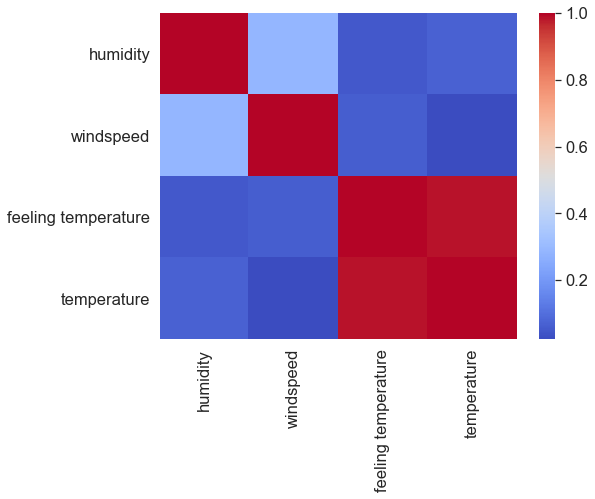

In [37]:
plt.figure(figsize=(8,6))
sns.set(font_scale=1.5)
sns.heatmap(data_M.drop("hour", axis=1).corr().abs(),cmap="coolwarm");

In [38]:
Correlation_Values=data_M.drop(columns="hour").corr().abs().unstack().sort_values(ascending=False).drop_duplicates()
Correlation_Values

temperature          temperature            1.000000
                     feeling temperature    0.987672
windspeed            humidity               0.290105
temperature          humidity               0.069881
feeling temperature  windspeed              0.062336
                     humidity               0.051918
temperature          windspeed              0.023125
dtype: float64

### Commnets:
   - we see that temperature and feeling temperature are highly correlated an we will drop temperature because of smaller IV

In [39]:
data_M=final_data[['humidity','windspeed','feeling temperature','hour']]

In [40]:
data_M.head()

,humidity,windspeed,feeling temperature,hour
index,,,,
2011-01-01,0.81,0.0,0.2879,0
2011-01-01,0.80,0.0,0.2727,0
2011-01-01,0.80,0.0,0.2727,0
2011-01-01,0.75,0.0,0.2879,0
2011-01-01,0.75,0.0,0.2879,0


### Our final dataset for model

# Comments:
   - since we have no categorical variables in our final dataset we dont have to use dummy variable creation (i think :|)
   - also our datset originaly was already labeled, so we didnt do label encoder either
   

## 3. Model development

### Model 1:
- TARGET VARIABLE "hour":
  - 0 = hours from 0 to 11
  - 1 = hours from 12 to 23

In [41]:
from sklearn.model_selection import train_test_split

# Read the data
data = data_M

# Separate target from predictors
y = data.hour
X = data.drop(['hour'], axis=1)

# Divide data into training and test subsets in ratio 80% / 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=0)


In [42]:
from sklearn.preprocessing import StandardScaler

sc=StandardScaler()

X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

#### Standardization typically means rescales data to have a mean of 0 and a standard deviation of 1 (unit variance).
#### Machine learning algorithms perform better and faster when we transform attributes (rescale data, variables) with a Gaussian distribution aka Standard Scaler.

In [43]:
from sklearn.pipeline import Pipeline
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_absolute_error

modelXGBC = XGBClassifier(n_estimators=500)
modelMLPC = MLPClassifier(hidden_layer_sizes=(10, 10, 10), max_iter=500)
modelRFC = RandomForestClassifier(n_estimators=100, random_state=0)
modelSVC = SVC()
modelLogReg = LogisticRegression()

# Bundle preprocessing and modeling code in a pipeline
my_pipeline1 = Pipeline(steps=[('model', modelXGBC)])
my_pipeline2 = Pipeline(steps=[('model', modelMLPC)])
my_pipeline3 = Pipeline(steps=[('model', modelRFC)])
my_pipeline4 = Pipeline(steps=[('model', modelSVC)])
my_pipeline5 = Pipeline(steps=[('model', modelLogReg)])

# Preprocessing of training data, fit model 
my_pipeline1.fit(X_train, y_train)
my_pipeline2.fit(X_train, y_train)
my_pipeline3.fit(X_train, y_train)
my_pipeline4.fit(X_train, y_train)
my_pipeline5.fit(X_train, y_train)

# Preprocessing of test data, get predictions
preds1 = my_pipeline1.predict(X_test)
preds2 = my_pipeline2.predict(X_test)
preds3 = my_pipeline3.predict(X_test)
preds4 = my_pipeline4.predict(X_test)
preds5 = my_pipeline5.predict(X_test)

# Evaluate the model
score1 = mean_absolute_error(y_test, preds1)
score2 = mean_absolute_error(y_test, preds2)
score3 = mean_absolute_error(y_test, preds3)
score4 = mean_absolute_error(y_test, preds4)
score5 = mean_absolute_error(y_test, preds5)

print("Mean Absolute Error for XGBClassifier:",score1)
print("Mean Absolute Error for Multi-layer Perceptron Classifier:",score2)
print("Mean Absolute Error for Random Forest Classifier:",score3)
print("Mean Absolute Error for Support Vector Classification:",score4)
print("Mean Absolute Error for Logistic Regression:",score5)

Mean Absolute Error for XGBClassifier: 0.32077100115074797
Mean Absolute Error for Multi-layer Perceptron Classifier: 0.3181818181818182
Mean Absolute Error for Random Forest Classifier: 0.36018411967779057
Mean Absolute Error for Support Vector Classification: 0.3173187571921749
Mean Absolute Error for Logistic Regression: 0.3273878020713464


#### Mean Absolute Error (MAE):
- MAE is one of the most common metrics has been used to calculate error. It measures performance of models which are applied on continuous variables. So for calculating MAE, firstly we should know what is the meaning of error here. Error is prediction error of model:
                                 PredictionError = ActualError - PredictedValue
- MAE is calculated for each row of data, then take the absolute value of them and finally compute the mean of all absolute prediction errors.
- as more MAE is closer to zero(0) the better evaluation it does

In [44]:
# Cross-validation will give better measures of model performance
# It devides dataset into "folds" (cv) and runs evaluation on that devided "folds"
from sklearn.model_selection import cross_val_score

# Multiply by -1 since sklearn calculates *negative* MAE
scoresCV1 = -1 * cross_val_score(my_pipeline1, X, y,
                              cv=5,
                              scoring='neg_mean_absolute_error')

scoresCV2 = -1 * cross_val_score(my_pipeline2, X, y,
                              cv=5,
                              scoring='neg_mean_absolute_error')

scoresCV3 = -1 * cross_val_score(my_pipeline3, X, y,
                              cv=5,
                              scoring='neg_mean_absolute_error')

scoresCV4 = -1 * cross_val_score(my_pipeline4, X, y,
                              cv=5,
                              scoring='neg_mean_absolute_error')

scoresCV5 = -1 * cross_val_score(my_pipeline5, X, y,
                              cv=5,
                              scoring='neg_mean_absolute_error')


print("Average Mean Absolute Error score (across experiments) for XGBClassifier:", scoresCV1.mean())
print("Average Mean Absolute Error score (across experiments) for (Neural Net) Multi-layer Perceptron Classifier:",score2)
print("Average Mean Absolute Error score (across experiments) for Random Forest Classifier:", scoresCV3.mean())
print("Average Mean Absolute Error score (across experiments) for Support Vector Classification:", scoresCV4.mean())
print("Average Mean Absolute Error score (across experiments) for Logistic Regression:", scoresCV5.mean())

Average Mean Absolute Error score (across experiments) for XGBClassifier: 0.3301079005282853
Average Mean Absolute Error score (across experiments) for (Neural Net) Multi-layer Perceptron Classifier: 0.3181818181818182
Average Mean Absolute Error score (across experiments) for Random Forest Classifier: 0.3846021766211857
Average Mean Absolute Error score (across experiments) for Support Vector Classification: 0.32619635035053324
Average Mean Absolute Error score (across experiments) for Logistic Regression: 0.32562210191674734


#### Cross-validation  MAE score is slightly worse than MAE score from direct model evaulation.

## XGBOOST-Classifier

In [45]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score,classification_report,roc_curve,auc

XGBC = XGBClassifier(n_estimators=500)
XGBC.fit(X_train, y_train)
pred_XGBC = XGBC.predict(X_test)

In [46]:
print(classification_report(y_test, pred_XGBC))
print("Confusion Matrix:\n",confusion_matrix(y_test, pred_XGBC))

              precision    recall  f1-score   support

           0       0.65      0.75      0.70      1718
           1       0.71      0.61      0.66      1758

   micro avg       0.68      0.68      0.68      3476
   macro avg       0.68      0.68      0.68      3476
weighted avg       0.68      0.68      0.68      3476

Confusion Matrix:
 [[1282  436]
 [ 679 1079]]


#### Confusion Matrix terminology:
- **True Positives (TP)**: correct prediction of someone who is renting bike before noon - `1282`
- **True Negatives (TN)**: correct prediction of someone who is renting bike after noon - `1079`
- **False Positives (FP)**: incorrect prediction of someone who is renting bike before noon - `436`
- **False Negatives (FN)**: incorrect prediction of someone who is renting bike after noon - `679` 


In [47]:
XBGC_acc = accuracy_score(y_test,pred_XGBC)
XGBC_prec = precision_score(y_test,pred_XGBC)
XGBC_rec = recall_score(y_test,pred_XGBC)
XGBC_f1 = f1_score(y_test,pred_XGBC)

print("XGBClassifier have "'{:.2%}'.format(XBGC_acc),"accuracy!")
print("XGBClassifier have "'{:.2%}'.format(XGBC_prec),"precision!")
print("XGBClassifier have "'{:.2%}'.format(XGBC_rec),"recall score!")
print("XGBClassifier have "'{:.2%}'.format(XGBC_f1),"F1 score!")

XGBClassifier have 67.92% accuracy!
XGBClassifier have 71.22% precision!
XGBClassifier have 61.38% recall score!
XGBClassifier have 65.93% F1 score!


$ \text{Accuracy} = \frac{Number-of-correct-predictions}{Total-number-of-predictions} $

$ \text{Precision} = \frac{TP}{TP + FP} $

$ \text{Recall} = \frac{TP}{TP + FN} $

$ \text{F1} = 2x\frac{Precision * Recall}{Precision + Recall} $

In [48]:
pred_XGBC_roc = XGBC.fit(X_train, y_train).predict_proba(X_test)[:,1] 

false_positive_rate_XGBC, true_positive_rate_XGBC, thresholds_XGBC = roc_curve(y_test,pred_XGBC_roc)
roc_auc_XGBC = auc(false_positive_rate_XGBC, true_positive_rate_XGBC)

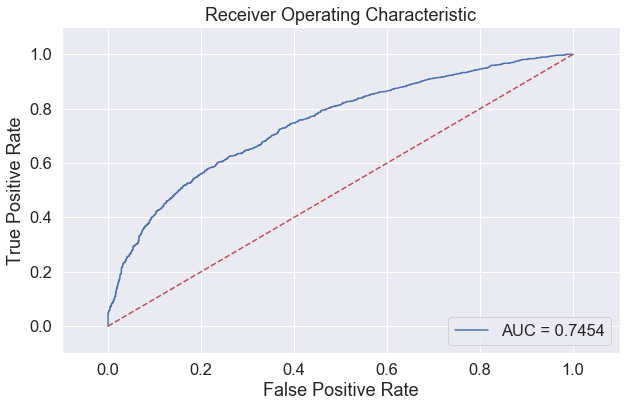

In [49]:
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate_XGBC, true_positive_rate_XGBC, 'b', label='AUC = %0.4f'% roc_auc_XGBC)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.1])
plt.ylim([-0.1,1.1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

#### AUC - ROC curve 
- is a performance measurement for classification problem at various thresholds settings
- ROC is a probability curve and AUC represents degree or measure of separability. It tells how much model is capable of distinguishing between classes
- Higher the AUC, better the model is at predicting 0s as 0s and 1s as 1s, that means, higher the AUC, better the model is at distinguishing between people who are churners and thoes who are not
- An excellent model has AUC near to the 1 which means it has good measure of separability
- A poor model has AUC near to the 0 which means it has worst measure of separability
- In fact it means it is reciprocating the result. It is predicting 0s as 1s and 1s as 0s. And when AUC is 0.5, it means model has no class separation capacity whatsoever!

## Logistic Regression

In [50]:
LogReg = LogisticRegression()
LogReg.fit(X_train, y_train)
pred_LogReg = LogReg.predict(X_test)

print(classification_report(y_test, pred_LogReg))
print("Confusion Matrix:\n",confusion_matrix(y_test, pred_LogReg))

              precision    recall  f1-score   support

           0       0.66      0.70      0.68      1718
           1       0.69      0.65      0.67      1758

   micro avg       0.67      0.67      0.67      3476
   macro avg       0.67      0.67      0.67      3476
weighted avg       0.67      0.67      0.67      3476

Confusion Matrix:
 [[1204  514]
 [ 624 1134]]


In [51]:
LogReg_acc = accuracy_score(y_test,pred_LogReg)
LogReg_prec = precision_score(y_test,pred_LogReg)
LogReg_rec = recall_score(y_test,pred_LogReg)
LogReg_f1 = f1_score(y_test,pred_LogReg)

print("Logistic Regression have "'{:.2%}'.format(LogReg_acc),"accuracy!")
print("Logistic Regression have "'{:.2%}'.format(LogReg_prec),"precision!")
print("Logistic Regression have "'{:.2%}'.format(LogReg_rec),"recall score!")
print("Logistic Regression have "'{:.2%}'.format(LogReg_f1),"F1 score!")

Logistic Regression have 67.26% accuracy!
Logistic Regression have 68.81% precision!
Logistic Regression have 64.51% recall score!
Logistic Regression have 66.59% F1 score!


In [52]:
pred_LogReg_roc =LogReg.fit(X_train, y_train).predict_proba(X_test)[:,1]


false_positive_rate_LogReg, true_positive_rate_LogReg, thresholds_LogReg = roc_curve(y_test,pred_LogReg_roc)
roc_auc_LogReg = auc(false_positive_rate_LogReg, true_positive_rate_LogReg)

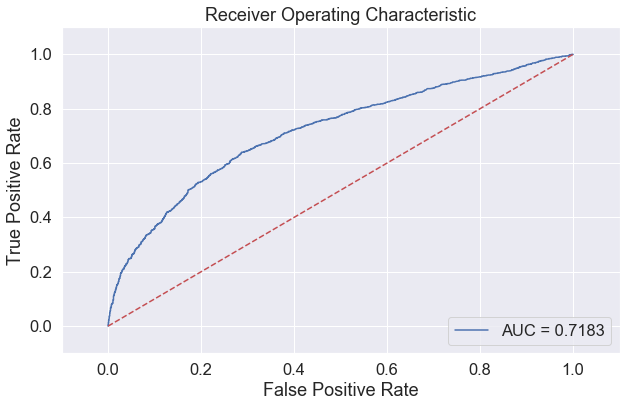

In [53]:
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate_LogReg, true_positive_rate_LogReg, 'b', label='AUC = %0.4f'% roc_auc_LogReg)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.1])
plt.ylim([-0.1,1.1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## NN Multi-layer Perceptron Classifier

In [54]:
MLPC = MLPClassifier(hidden_layer_sizes=(10, 10, 10), max_iter=500)
MLPC.fit(X_train, y_train)
pred_MLPC = MLPC.predict(X_test)

print(classification_report(y_test, pred_MLPC))
print("Confusion Matrix:\n",confusion_matrix(y_test, pred_MLPC))

              precision    recall  f1-score   support

           0       0.66      0.74      0.70      1718
           1       0.71      0.62      0.66      1758

   micro avg       0.68      0.68      0.68      3476
   macro avg       0.68      0.68      0.68      3476
weighted avg       0.68      0.68      0.68      3476

Confusion Matrix:
 [[1275  443]
 [ 669 1089]]


In [55]:
MLPC_acc = accuracy_score(y_test,pred_MLPC)
MLPC_prec = precision_score(y_test,pred_MLPC)
MLPC_rec = recall_score(y_test,pred_MLPC)
MLPC_f1 = f1_score(y_test,pred_MLPC)

print("(Neural Net) Multi-layer Perceptron Classifier have "'{:.2%}'.format(MLPC_acc),"accuracy!")
print("(Neural Net) Multi-layer Perceptron Classifier have "'{:.2%}'.format(MLPC_prec),"precision!")
print("(Neural Net) Multi-layer Perceptron Classifier have "'{:.2%}'.format(MLPC_rec),"recall score!")
print("(Neural Net) Multi-layer Perceptron Classifier have "'{:.2%}'.format(MLPC_f1),"F1 score!")

(Neural Net) Multi-layer Perceptron Classifier have 68.01% accuracy!
(Neural Net) Multi-layer Perceptron Classifier have 71.08% precision!
(Neural Net) Multi-layer Perceptron Classifier have 61.95% recall score!
(Neural Net) Multi-layer Perceptron Classifier have 66.20% F1 score!


In [56]:
pred_MLPC_roc =MLPC.fit(X_train, y_train).predict_proba(X_test)[:,1]

false_positive_rate_MLPC, true_positive_rate_MLPC, thresholds_MLPC = roc_curve(y_test,pred_MLPC_roc)
roc_auc_MLPC = auc(false_positive_rate_MLPC, true_positive_rate_MLPC)

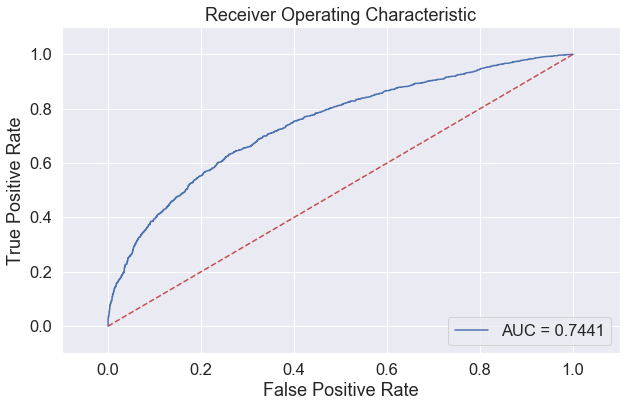

In [57]:
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate_MLPC, true_positive_rate_MLPC, 'b', label='AUC = %0.4f'% roc_auc_MLPC)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.1])
plt.ylim([-0.1,1.1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## Support Vector Classification

In [58]:
svc = SVC(probability=True)
svc.fit(X_train, y_train)
pred_svc = svc.predict(X_test)

print(classification_report(y_test, pred_svc))
print("Confusion Matrix:\n",confusion_matrix(y_test, pred_svc))

              precision    recall  f1-score   support

           0       0.65      0.76      0.70      1718
           1       0.72      0.61      0.66      1758

   micro avg       0.68      0.68      0.68      3476
   macro avg       0.69      0.68      0.68      3476
weighted avg       0.69      0.68      0.68      3476

Confusion Matrix:
 [[1307  411]
 [ 692 1066]]


In [59]:
svc_acc = accuracy_score(y_test,pred_svc)
svc_prec = precision_score(y_test,pred_svc)
svc_rec = recall_score(y_test,pred_svc)
svc_f1 = f1_score(y_test,pred_svc)

print("Support Vector Classification have "'{:.2%}'.format(svc_acc),"accuracy!")
print("Support Vector Classification have "'{:.2%}'.format(svc_prec),"precision!")
print("Support Vector Classification have "'{:.2%}'.format(svc_rec),"recall score!")
print("Support Vector Classification have "'{:.2%}'.format(svc_f1),"F1 score!")

Support Vector Classification have 68.27% accuracy!
Support Vector Classification have 72.17% precision!
Support Vector Classification have 60.64% recall score!
Support Vector Classification have 65.90% F1 score!


In [60]:
pred_svc_roc =svc.fit(X_train, y_train).predict_proba(X_test)[:,1]

false_positive_rate_svc, true_positive_rate_svc, thresholds_svc = roc_curve(y_test,pred_svc_roc)
roc_auc_svc = auc(false_positive_rate_svc, true_positive_rate_svc)

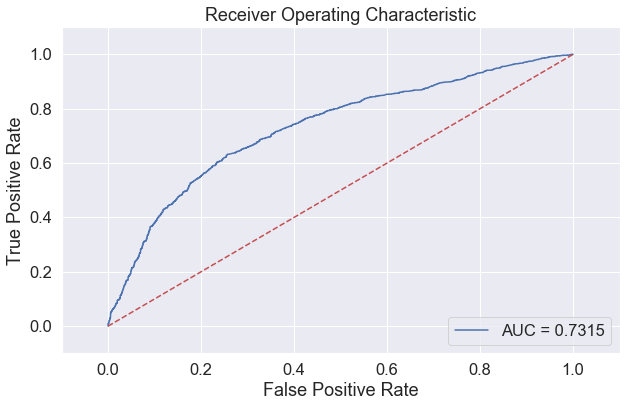

In [61]:
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate_svc, true_positive_rate_svc, 'b', label='AUC = %0.4f'% roc_auc_svc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.1])
plt.ylim([-0.1,1.1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## Random Forest Classifier

In [62]:
RFC = RandomForestClassifier(n_estimators=100, random_state=0)
RFC.fit(X_train, y_train)
pred_RFC = RFC.predict(X_test)

print(classification_report(y_test, pred_RFC))
print("Confusion Matrix:\n",confusion_matrix(y_test, pred_RFC))

              precision    recall  f1-score   support

           0       0.63      0.65      0.64      1718
           1       0.65      0.63      0.64      1758

   micro avg       0.64      0.64      0.64      3476
   macro avg       0.64      0.64      0.64      3476
weighted avg       0.64      0.64      0.64      3476

Confusion Matrix:
 [[1115  603]
 [ 649 1109]]


In [63]:
RFC_acc = accuracy_score(y_test,pred_RFC)
RFC_prec = precision_score(y_test,pred_RFC)
RFC_rec = recall_score(y_test,pred_RFC)
RFC_f1 = f1_score(y_test,pred_RFC)

print("Random Forest Classifier have "'{:.2%}'.format(RFC_acc),"accuracy!")
print("Random Forest Classifier have "'{:.2%}'.format(RFC_prec),"precision!")
print("Random Forest Classifier have "'{:.2%}'.format(RFC_rec),"recall score!")
print("Random Forest Classifier have "'{:.2%}'.format(RFC_f1),"F1 score!")

Random Forest Classifier have 63.98% accuracy!
Random Forest Classifier have 64.78% precision!
Random Forest Classifier have 63.08% recall score!
Random Forest Classifier have 63.92% F1 score!


In [64]:
pred_RFC_roc =RFC.fit(X_train, y_train).predict_proba(X_test)[:,1]

false_positive_rate_RFC, true_positive_rate_RFC, thresholds_RFC = roc_curve(y_test,pred_RFC_roc)
roc_auc_RFC = auc(false_positive_rate_RFC, true_positive_rate_RFC)

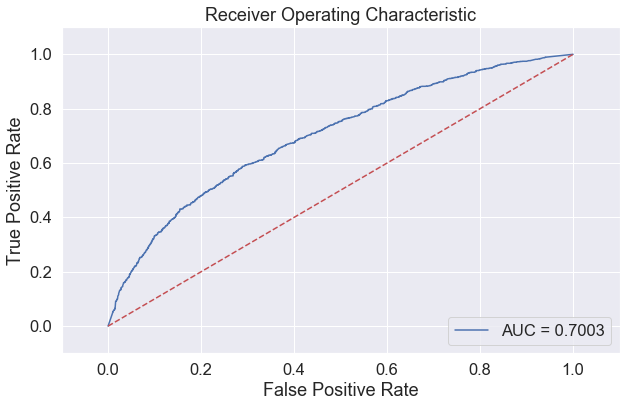

In [65]:
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate_RFC, true_positive_rate_RFC, 'b', label='AUC = %0.4f'% roc_auc_RFC)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.1])
plt.ylim([-0.1,1.1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### All ROC curves together - model 1

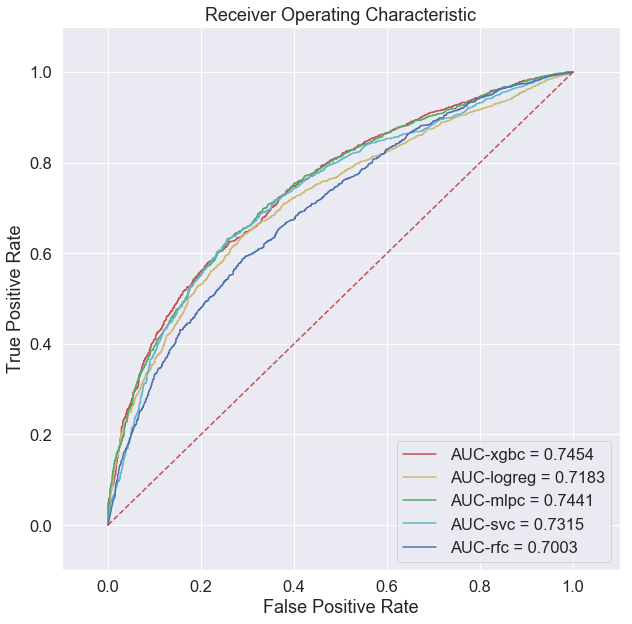

In [66]:
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate_XGBC, true_positive_rate_XGBC, 'r', label='AUC-xgbc = %0.4f'% roc_auc_XGBC)
plt.plot(false_positive_rate_LogReg, true_positive_rate_LogReg, 'y', label='AUC-logreg = %0.4f'% roc_auc_LogReg)
plt.plot(false_positive_rate_MLPC, true_positive_rate_MLPC, 'g', label='AUC-mlpc = %0.4f'% roc_auc_MLPC)
plt.plot(false_positive_rate_svc, true_positive_rate_svc, 'c', label='AUC-svc = %0.4f'% roc_auc_svc)
plt.plot(false_positive_rate_RFC, true_positive_rate_RFC, 'b', label='AUC-rfc = %0.4f'% roc_auc_RFC)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.1])
plt.ylim([-0.1,1.1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### Comments:
 - we see that results of algorhitms are very similar
 - they are not very good but regarding non-existing target variable and our freely aproach to create one on our own we get some mediocre results
 - ROC Curve and AUC shows us not so bad performance

### Model 2:
- TARGET VARIABLE "hour":
  - 0 = all hours except 7,8,17,18
  - 1 = hours: 7,8,17,18

In [67]:
X2=data_hour.drop(columns="hour")
y2=data_hour["hour"].replace({0:0,1:0,2:0,3:0,4:0,5:0,6:0,9:0,10:0,11:0,12:0,13:0,14:0,15:0,16:0,19:0,20:0,21:0,22:0,23:0,
                             7:1,8:1,17:1,18:1})

In [68]:
final_data2=pd.concat([X2,y2], axis=1)

In [69]:
data_M2=final_data2[["humidity","windspeed","feeling temperature","hour"]]

In [70]:
data_M2.head(10)

,humidity,windspeed,feeling temperature,hour
index,,,,
2011-01-01,0.81,0.0000,0.2879,0
2011-01-01,0.80,0.0000,0.2727,0
2011-01-01,0.80,0.0000,0.2727,0
2011-01-01,0.75,0.0000,0.2879,0
2011-01-01,0.75,0.0000,0.2879,0
2011-01-01,0.75,0.0896,0.2576,0
2011-01-01,0.80,0.0000,0.2727,0
2011-01-01,0.86,0.0000,0.2576,1
2011-01-01,0.75,0.0000,0.2879,1


In [71]:
# Read the data
data2 = data_M2

# Separate target from predictors
y2 = data2.hour
X2 = data2.drop(['hour'], axis=1)

# Divide data into training and test subsets in ratio 80% / 20%
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, train_size=0.8, test_size=0.2, random_state=0)


In [72]:
sc2=StandardScaler()

X2_train=sc2.fit_transform(X2_train)
X2_test=sc2.transform(X2_test)

In [73]:
modelXGBC_2 = XGBClassifier(n_estimators=500)
modelMLPC_2 = MLPClassifier(hidden_layer_sizes=(10, 10, 10), max_iter=500)
modelRFC_2 = RandomForestClassifier(n_estimators=100, random_state=0)
modelSVC_2 = SVC()
modelLogReg_2 = LogisticRegression()

# Bundle preprocessing and modeling code in a pipeline
my_pipeline1_2 = Pipeline(steps=[('model', modelXGBC_2)])
my_pipeline2_2 = Pipeline(steps=[('model', modelMLPC_2)])
my_pipeline3_2 = Pipeline(steps=[('model', modelRFC_2)])
my_pipeline4_2 = Pipeline(steps=[('model', modelSVC_2)])
my_pipeline5_2 = Pipeline(steps=[('model', modelLogReg_2)])

# Preprocessing of training data, fit model 
my_pipeline1_2.fit(X2_train, y2_train)
my_pipeline2_2.fit(X2_train, y2_train)
my_pipeline3_2.fit(X2_train, y2_train)
my_pipeline4_2.fit(X2_train, y2_train)
my_pipeline5_2.fit(X2_train, y2_train)

# Preprocessing of test data, get predictions
preds1_2 = my_pipeline1_2.predict(X2_test)
preds2_2 = my_pipeline2_2.predict(X2_test)
preds3_2 = my_pipeline3_2.predict(X2_test)
preds4_2 = my_pipeline4_2.predict(X2_test)
preds5_2 = my_pipeline5_2.predict(X2_test)

# Evaluate the model
score1_2 = mean_absolute_error(y2_test, preds1_2)
score2_2 = mean_absolute_error(y2_test, preds2_2)
score3_2 = mean_absolute_error(y2_test, preds3_2)
score4_2 = mean_absolute_error(y2_test, preds4_2)
score5_2 = mean_absolute_error(y2_test, preds5_2)

print("Mean Absolute Error for XGBClassifier:",score1_2)
print("Mean Absolute Error for Multi-layer Perceptron Classifier:",score2_2)
print("Mean Absolute Error for Random Forest Classifier:",score3_2)
print("Mean Absolute Error for Support Vector Classification:",score4_2)
print("Mean Absolute Error for Logistic Regression:",score5_2)

Mean Absolute Error for XGBClassifier: 0.167433831990794
Mean Absolute Error for Multi-layer Perceptron Classifier: 0.16484464902186421
Mean Absolute Error for Random Forest Classifier: 0.21029919447640966
Mean Absolute Error for Support Vector Classification: 0.16484464902186421
Mean Absolute Error for Logistic Regression: 0.16484464902186421


#### Model evaluation gives promising MAE score!

#### No need for Cross-validation score since it gives slicely worse results.

## XGBOOST-Classifier

In [74]:
XGBC_2 = XGBClassifier(n_estimators=500)
XGBC_2.fit(X2_train, y2_train)
pred_XGBC_2 = XGBC_2.predict(X2_test)

In [75]:
print(classification_report(y2_test, pred_XGBC_2))
print("Confusion Matrix:\n",confusion_matrix(y2_test, pred_XGBC_2))

              precision    recall  f1-score   support

           0       0.83      1.00      0.91      2903
           1       0.00      0.00      0.00       573

   micro avg       0.83      0.83      0.83      3476
   macro avg       0.42      0.50      0.45      3476
weighted avg       0.70      0.83      0.76      3476

Confusion Matrix:
 [[2894    9]
 [ 573    0]]


In [76]:
XBGC2_acc = accuracy_score(y2_test,pred_XGBC_2)
XGBC2_prec = precision_score(y2_test,pred_XGBC_2)
XGBC2_rec = recall_score(y2_test,pred_XGBC_2)
XGBC2_f1 = f1_score(y2_test,pred_XGBC_2)

print("XGBClassifier have "'{:.2%}'.format(XBGC2_acc),"accuracy!")
print("XGBClassifier have "'{:.2%}'.format(XGBC2_prec),"precision!")
print("XGBClassifier have "'{:.2%}'.format(XGBC2_rec),"recall score!")
print("XGBClassifier have "'{:.2%}'.format(XGBC2_f1),"F1 score!")

XGBClassifier have 83.26% accuracy!
XGBClassifier have 0.00% precision!
XGBClassifier have 0.00% recall score!
XGBClassifier have 0.00% F1 score!


In [77]:
pred_XGBC2_roc = XGBC_2.fit(X2_train, y2_train).predict_proba(X2_test)[:,1] 

false_positive_rate_XGBC2, true_positive_rate_XGBC2, thresholds_XGBC2 = roc_curve(y2_test,pred_XGBC2_roc)
roc_auc_XGBC2 = auc(false_positive_rate_XGBC2, true_positive_rate_XGBC2)

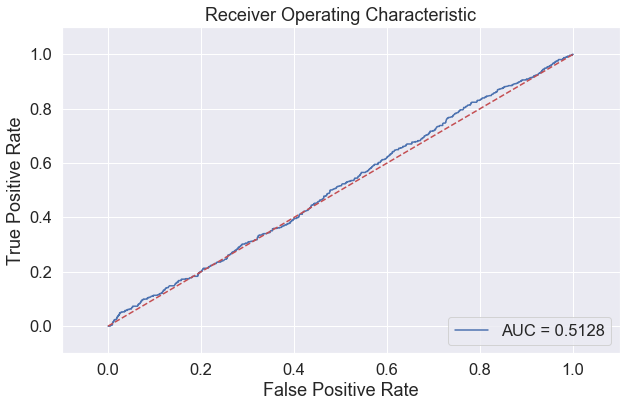

In [78]:
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate_XGBC2, true_positive_rate_XGBC2, 'b', label='AUC = %0.4f'% roc_auc_XGBC2)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.1])
plt.ylim([-0.1,1.1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### Comments:
 - well model 2 development gave some promising MAE results
 - but algorhitm scores are terrible... high accuracy with non-existing precision, recall and F1 score...
 - i wont either bother to test other algorhitms because they will give even worse score
 - i think that preformance are like this because of not so big diffenrece between data for this target varibale besides      number of renting bikes varibles that we drop

## Let me try prediction of model 2 on raw dataset (no variable drops, no reduction...)

In [79]:
X3=data_hour.drop(columns="hour", axis=1)
y3=data_hour["hour"].replace({0:0,1:0,2:0,3:0,4:0,5:0,6:0,9:0,10:0,11:0,12:0,13:0,14:0,15:0,16:0,19:0,20:0,21:0,22:0,23:0,
                             7:1,8:1,17:1,18:1})

X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, train_size=0.8, test_size=0.2, random_state=0)

XGBC_3 = XGBClassifier(n_estimators=500)
XGBC_3.fit(X3_train, y3_train)
pred_XGBC_3 = XGBC_3.predict(X3_test)

print(classification_report(y3_test, pred_XGBC_3))
print("Confusion Matrix:\n",confusion_matrix(y3_test, pred_XGBC_3))

              precision    recall  f1-score   support

           0       0.92      0.99      0.95      2903
           1       0.90      0.57      0.70       573

   micro avg       0.92      0.92      0.92      3476
   macro avg       0.91      0.78      0.83      3476
weighted avg       0.92      0.92      0.91      3476

Confusion Matrix:
 [[2866   37]
 [ 244  329]]


In [80]:
XBGC3_acc = accuracy_score(y3_test,pred_XGBC_3)
XGBC3_prec = precision_score(y3_test,pred_XGBC_3)
XGBC3_rec = recall_score(y3_test,pred_XGBC_3)
XGBC3_f1 = f1_score(y3_test,pred_XGBC_3)

print("XGBClassifier have "'{:.2%}'.format(XBGC3_acc),"accuracy!")
print("XGBClassifier have "'{:.2%}'.format(XGBC3_prec),"precision!")
print("XGBClassifier have "'{:.2%}'.format(XGBC3_rec),"recall score!")
print("XGBClassifier have "'{:.2%}'.format(XGBC3_f1),"F1 score!")

XGBClassifier have 91.92% accuracy!
XGBClassifier have 89.89% precision!
XGBClassifier have 57.42% recall score!
XGBClassifier have 70.07% F1 score!


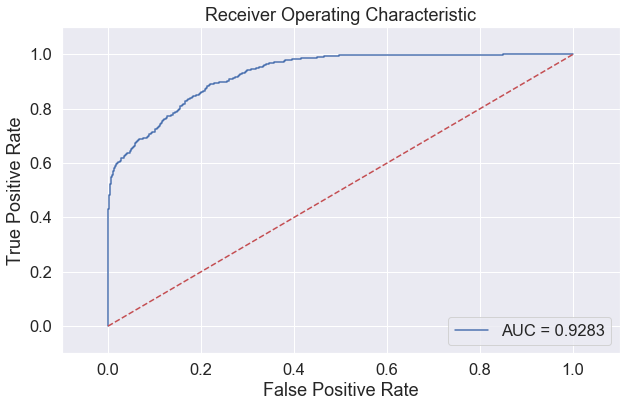

In [81]:
pred_XGBC3_roc = XGBC_3.fit(X3_train, y3_train).predict_proba(X3_test)[:,1] 

false_positive_rate_XGBC3, true_positive_rate_XGBC3, thresholds_XGBC3 = roc_curve(y3_test,pred_XGBC3_roc)
roc_auc_XGBC3 = auc(false_positive_rate_XGBC3, true_positive_rate_XGBC3)


plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate_XGBC3, true_positive_rate_XGBC3, 'b', label='AUC = %0.4f'% roc_auc_XGBC3)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.1])
plt.ylim([-0.1,1.1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### Comments:
 - well very interesting results... very high scores in everything (well except recall)
 - ROC Curve and AUC performance is almost perfect... and because of that I am suspicious!

## Final Comments:
  - results form model 1 gives us mediocre scores for prediction if some one rents bike before noon or after noon
  - results for model 2 gives terrible scores for prediction if some one rents bike for going to work/going hom from work or for rest of the day...
  - results for model 2 gives suspicous scores when we use raw non-preprocess dataset
  - we can say that our dataset provide many info about people habit during every period of year, month, weekday and hour
  - with non-existing target variable we needed to create our own and based on that there is chance that we create inadequate varibale for final dataset (3 columns) - only my thinking
  - if there was column that separets casual and registered users that would be very good target variable for model performance measures